### Creating a mass-weighted model and plotting the generated samples

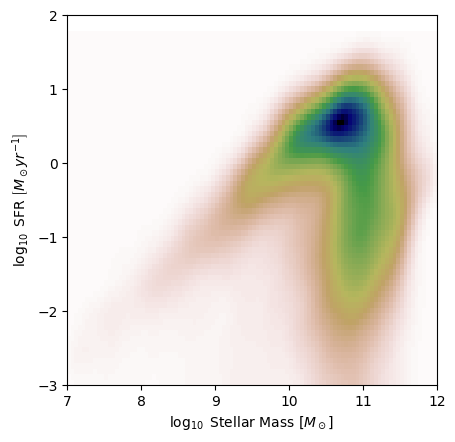

In [ ]:
import matplotlib.pylab as plt

import logpdfs
import emcee_utils as mc
import sample_nf_probability_density as leja_utils

# Initialize Leja normalized flow
flow = leja_utils.load_nf()
prob_density = leja_utils.sample_density(flow,redshift_smoothing=True)

# Create the logpdf of your model. In this example, we choose z=0.3, with continuity model
# (i.e., generate also galaxies with mass lower than the cutoff mass,
# see Section 3.1 Extending the Distribution Function)
z = 0.3
simple_logpdf = logpdfs.get_logpdf(z, prob_density, continuity=True)
mass_weighted_logpdf = logpdfs.get_weighted_logpdf(simple_logpdf, a=1, b=0)

# Generate samples using MCMC
samples = mc.get_samples(mass_weighted_logpdf)

# Plot samples generated by emcee
ax, _, _ = mc.plot_from_samples(samples)
ax.set_xlim([7, 12])
ax.set_ylim([-3,2])
ax.set_xlabel(r"$\log_{10}$" + " Stellar Mass " + r"$\left[M_\odot\right]$")
ax.set_ylabel(r"$\log_{10}$" + " SFR " + r"$\left[M_\odot yr^{-1}\right]$")
plt.show()

### Loading host galaxies and calculating pvalues of the mass-weighted model

In [25]:
import pandas as pd

# Example for host galaxies dataset
example_hosts = pd.DataFrame({
    "Name": ["AT1", "AT2", "AT3"],  # Name of Astrophysical Transient
    "Mstar": [1e10, 5e9, 2e10],     # Stellar mass in solar masses
    "SFR": [1.5, 0.8, 2.3],         # Star formation rate in solar masses per year
    "z": [0.19, 0.4, 0.23]          # Redshift
})

# Calculate the nominal p-value of the mass-weighted model
p_nom = mc.calc_weighted_pnom(example_hosts, prob_density, a=1, b=0)
print(p_nom)

Generating samples for a = 1 b = 0 ...


Generating samples for each redshift: 100%|██████████| 3/3 [00:01<00:00,  2.62hosts/s]


Likelihood of host galaxies:  60.65779027411569
0.8287500000000001


In [26]:
import numpy as np

# To obtain p<90% value, the host galaxies dataset needs in include errors
example_hosts = pd.DataFrame({
    "Name": ["AT1", "AT2", "AT3"],      # Name of Astrophysical Transient
    "Mstar": [1e10, 5e9, 2e10],         # Stellar mass in solar masses
    "SFR": [1.5, 0.8, 2.3],             # Star formation rate in solar masses per year
    "z": [0.19, 0.4, 0.23],             # Redshift
    "Mstar_uperr": [0.02, 0.04, 0.01],  # Upper error on stellar mass, in log10(M/M_sun)
    "Mstar_lowerr": [8e8, 4e8, 1.5e9],  # Lower error on stellar mass, in log10(M/M_sun)
    "SFR_uperr": [0.2, 0.1, 0.3],       # Upper error on SFR, in solar masses per year
    "SFR_lowerr": [0.1, 0.05, 0.2]      # Lower error on SFR, in solar masses per year
})


# Create a map of redshift to a mass-weighted logpdf at that redshift
z_to_logpdf = logpdfs.create_z_to_logpdf(example_hosts, prob_density, a=1, b=0)

# Calculate the nominal likelihood of your hosts based on the mass-weighted model
# This is needed if you want to obtain the p_nominal in the next step.
stacked_values = np.vstack([np.log10(example_hosts['Mstar']) ,np.log10(example_hosts['SFR']), example_hosts['z']])
nominal_likelihood = mc.calc_weighted_likelihood(z_to_logpdf, stacked_values.T)

# Calculate the p90 and pnom of the mass-weighted model based on your hosts.
p90, pnom, _, _ = mc.calc_p90(example_hosts, z_to_logpdf, nominal_likelihood)
print(p90, pnom)

Generating samples for each redshift: 100%|██████████| 3/3 [00:01<00:00,  2.60hosts/s]


0.8264687500000001 0.8188125
